 Step 1: Getting and Setting up the data
 Step 2: Visualizing current data
 Step 3: The mathematics behind the Least Squares Method
 Step 4: Using Numpy for a Univariate Linear Regression
 Step 5: Getting the error
 Step 6: Using sciket learn to implement the various univariate regression
 Step 7: Using Training and Validation
 Step 8: Predicting Prices
 Step 9: Residual Plots

Supervised Learning - Linear Regression

In [43]:
import numpy as np
import pandas as pd
from pandas import Series , DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [6]:
from sklearn.datasets import load_boston

In [7]:
##importing a boston dataset

In [8]:
boston = load_boston()

In [15]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

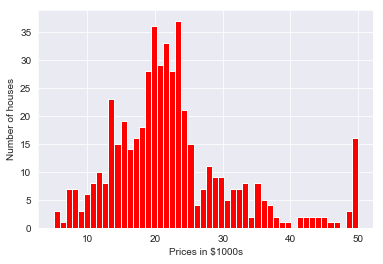

In [44]:
plt.hist(boston.target , bins = 50 ,color = 'red')

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

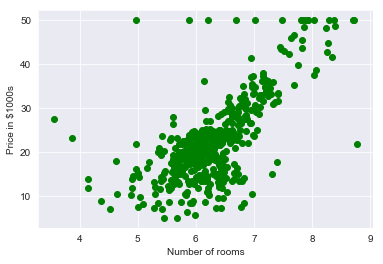

In [49]:
plt.scatter(boston.data[:,5],boston.target , color = 'green')

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [34]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
boston_df['Price'] = boston.target

In [38]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


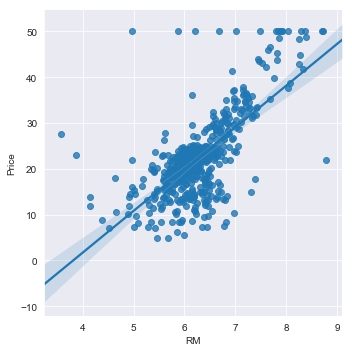

In [48]:
sns.lmplot('RM','Price',data=boston_df)

In [41]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [58]:
 X = boston_df.RM
X.shape

(506,)

In [88]:
X=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T

In [61]:
#X = np.vstack(boston_df.RM)

vstack() function is used to stack the sequence of input arrays vertical to make a single array

In [56]:
X.shape

(506, 1)

In [89]:
Y = boston_df.Price

In [90]:
X 

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [81]:
# [X 1]
#X = np.array([[value,1] for value in X])

In [82]:
X

array([[array([array([6.575, 1.   ]), 1], dtype=object), 1],
       [array([array([6.421, 1.   ]), 1], dtype=object), 1],
       [array([array([7.185, 1.   ]), 1], dtype=object), 1],
       ...,
       [array([array([6.976, 1.   ]), 1], dtype=object), 1],
       [array([array([6.794, 1.   ]), 1], dtype=object), 1],
       [array([array([6.03, 1.  ]), 1], dtype=object), 1]], dtype=object)

In [91]:
m , b = np.linalg.lstsq(X,Y)[0] 

C:\Users\sriram\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [92]:
print(m,b)

9.102108981180313 -34.670620776438575


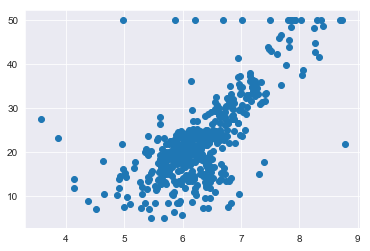

In [93]:
plt.plot(boston_df.RM , boston_df.Price ,'o')

In [94]:
x = boston_df.RM

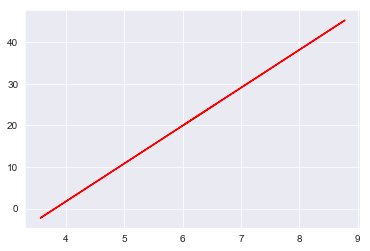

In [95]:
plt.plot(x, m*x + b,'r',label ='Best Fit Line')

In [98]:
result = np.linalg.lstsq(X,Y)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print (' The root mean square was %.2f' %rmse)

 The root mean square was 6.60


C:\Users\sriram\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [99]:
import sklearn
from sklearn.linear_model import LinearRegression

In [100]:
lreg = LinearRegression()

In [101]:
import sklearn
from sklearn.linear_model import LinearRegression

In [102]:
lreg = LinearRegression()

In [105]:
X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

In [106]:
lreg.fit(X_multi , Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
print ('The estimated intercept coefficient is %.2f' %lreg.intercept_)

print ('The number of coefficients used was %d' %len(lreg.coef_))

The estimated intercept coefficient is 36.46
The number of coefficients used was 13


In [115]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, boston_df.Price)

In [122]:
print (X_train.shape, X_test.shape , Y_train.shape , Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [123]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [133]:
print ('Fit a model X_train, and calculate the MSE with  Y_train: %.2f'  % np.mean((Y_train-pred_train)**2))

Fit a model X_train, and calculate the MSE with  Y_train: 46.39


In [134]:
print ('Fit a model X_train and calculate MSE with X_test and Y_test: %.2f' % np.mean((Y_test - pred_test)**2))

Fit a model X_train and calculate MSE with X_test and Y_test: 35.35


Residual = Observed value - Predicted value

Text(0.5, 1.0, 'Residual Plots')

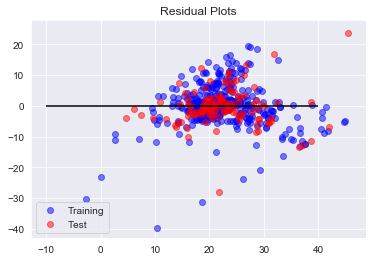

In [137]:
train = plt.scatter(pred_train,(pred_train -Y_train),c='b',alpha =0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y = 0 ,xmin =-10 ,xmax=40)

plt.legend((train,test),('Training' , 'Test'),loc = 'lower left')

plt.title('Residual Plots')